# The Sparks Foundation

# Data Science & Business Analytics Intern

# Name : Yasir Rehman Shakeel

# Task 1 : Prediction using Supervised Machine Learning

## Simple Linear Regression
### Predict the percentage of a student based on the number of study hours.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing the Dataset

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

##### Showing First five Rows

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##### Showing Last five Rows

In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.shape

(25, 2)

##### Dataset consists of 25 rows and 2 columns

# Descriptive Stats of Data

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking the information of Data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Checking for null values

In [8]:
data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [9]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

##### So we don't have null values in our data 

# Exploratory Data Analysis

<AxesSubplot:>

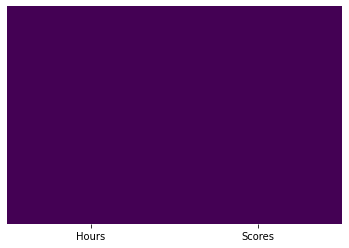

In [10]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',cbar=False)

##### In above graph there is no any yellow line, means there is no null value present in data.

c:\users\yasir\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

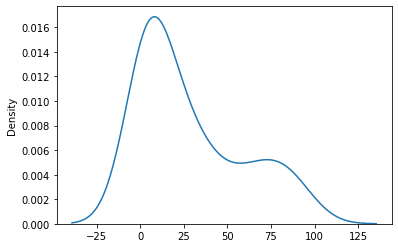

In [11]:
sns.distplot(data,hist=False)

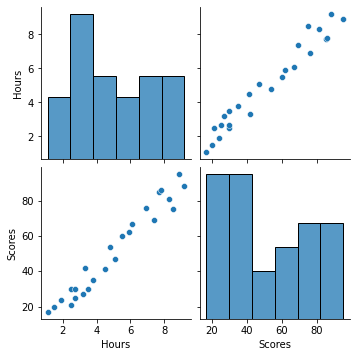

In [12]:
sns.pairplot(data)

##### To find manual relationship between the data

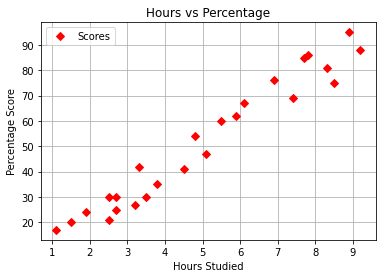

In [13]:
data.plot(x='Hours', y='Scores', style='D',color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid(True)
plt.show()

# Preparing the data

##### Divide the dataset into "attributes" (inputs) and "labels" (outputs)

In [14]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [16]:
print(x_train, y_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]] [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [17]:
print(x_test, y_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [20 27 69 30 62]


# Creating and Training the Model

In [18]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

LinearRegression()

# Plotting the regression line(y = mx+c)

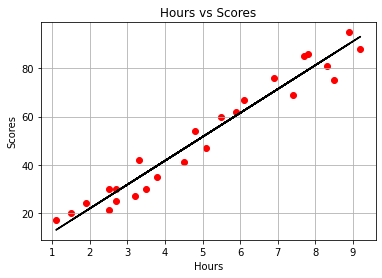

In [19]:
line = lr.coef_*x+lr.intercept_
plt.scatter(x, y,color = "red")
plt.plot(x, line,color='black')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

# Making Predictions

In [20]:
pred = lr.predict(x_test)
print("Predicted Values: ", pred)

Predicted Values:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Comparing Actual vs Predicted

In [21]:
df = pd.DataFrame({"Original Values":y_test,"Predicted Values":pred})
df

,Original Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Graphical Representation

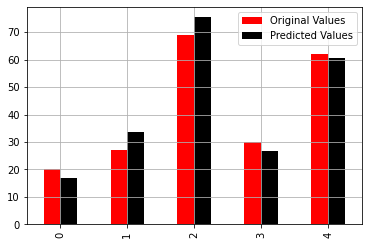

In [22]:
df.plot(kind="bar",color=('red','black'))
plt.grid(True)

# Predicting score if a student studies for 9.25 hrs per day

In [23]:
Hours = 9.25
result=lr.predict([[Hours]])
print("No of Hours = ",Hours)
print("Predicted Score = ",result)

No of Hours =  9.25
Predicted Score =  [93.69173249]


### We can conclude that if the student studies for 9.25 hours he/she can achieve 93.69%

# Evaluating the model

In [24]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.598769307217406
Root Mean Squared Error: 2.0454485813637495


# Thank You...!